In [37]:
# === Stage 1: Load Data and Create Synthetic Regions ===

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the richer dataset
df = pd.read_csv("../data/raw/dataset.csv")

print(" Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Rename for consistency
df.rename(columns={'ph': 'pH'}, inplace=True)

# Separate features and target
X = df.drop(columns=['label'])
y = df['label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create synthetic "RegionCluster" using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['RegionCluster'] = kmeans.fit_predict(X_scaled)

print("\n Synthetic 'RegionCluster' created:")
print(df['RegionCluster'].value_counts())

# Quick look
df.head()


 Dataset loaded successfully!
Shape: (620, 12)
Columns: ['N', 'P', 'K', 'ph', 'EC', 'S', 'Cu', 'Fe', 'Mn', 'Zn', 'B', 'label']

 Synthetic 'RegionCluster' created:
RegionCluster
0    290
2    222
1    108
Name: count, dtype: int64


,N,P,K,pH,EC,S,Cu,Fe,Mn,Zn,B,label,RegionCluster
0,143,69,217,5.9,0.58,0.23,10.20,116.35,59.96,54.85,21.29,pomegranate,2
1,170,36,216,5.9,0.15,0.28,15.69,114.20,56.87,31.28,28.62,pomegranate,0
2,158,66,219,6.8,0.34,0.20,15.29,65.87,51.81,57.12,27.59,pomegranate,0
3,133,45,207,6.4,0.94,0.21,8.48,103.10,43.81,68.50,47.29,pomegranate,2
4,132,48,218,6.7,0.54,0.19,5.59,63.40,56.40,46.71,31.04,pomegranate,0


In [39]:
# === Stage 2: Region-Based Model Validation ===

from sklearn.model_selection import GroupKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Prepare inputs
X = df.drop(columns=['label', 'RegionCluster'])
y = df['label']
groups = df['RegionCluster']

# Initialize GroupKFold (simulate regional splits)
gkf = GroupKFold(n_splits=3)

rf_scores, log_scores = [], []

print(" Region-Based Model Validation (using RegionCluster):\n")

for fold, (train_idx, test_idx) in enumerate(gkf.split(X, y, groups)):
    print(f"--- Fold {fold + 1} ---")
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    preds_rf = rf.predict(X_test)
    acc_rf = accuracy_score(y_test, preds_rf)
    f1_rf = f1_score(y_test, preds_rf, average="macro")
    rf_scores.append((acc_rf, f1_rf))
    
    # Logistic Regression
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)
    preds_log = log_reg.predict(X_test)
    acc_log = accuracy_score(y_test, preds_log)
    f1_log = f1_score(y_test, preds_log, average="macro")
    log_scores.append((acc_log, f1_log))
    
    print(f" Random Forest — Acc: {acc_rf:.3f} | F1: {f1_rf:.3f}")
    print(f" Logistic Regression — Acc: {acc_log:.3f} | F1: {f1_log:.3f}\n")

# --- Summary ---
rf_acc_mean = np.mean([a for a, _ in rf_scores])
log_acc_mean = np.mean([a for a, _ in log_scores])
rf_f1_mean = np.mean([f for _, f in rf_scores])
log_f1_mean = np.mean([f for _, f in log_scores])

print(" Mean Regional Performance Summary:")
print(f"Random Forest → Acc: {rf_acc_mean:.3f}, F1: {rf_f1_mean:.3f}")
print(f"Logistic Regression → Acc: {log_acc_mean:.3f}, F1: {log_f1_mean:.3f}")


 Region-Based Model Validation (using RegionCluster):

--- Fold 1 ---
 Random Forest — Acc: 0.566 | F1: 0.417
 Logistic Regression — Acc: 0.569 | F1: 0.412

--- Fold 2 ---


/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://s

 Random Forest — Acc: 0.410 | F1: 0.234
 Logistic Regression — Acc: 0.473 | F1: 0.285

--- Fold 3 ---
 Random Forest — Acc: 0.037 | F1: 0.014
 Logistic Regression — Acc: 0.148 | F1: 0.061

 Mean Regional Performance Summary:
Random Forest → Acc: 0.337, F1: 0.222
Logistic Regression → Acc: 0.397, F1: 0.253


/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Region-Based Validation (with StandardScaler):

Fold 1 → RF: 0.566 | LogReg: 0.397
Fold 2 → RF: 0.410 | LogReg: 0.468
Fold 3 → RF: 0.037 | LogReg: 0.037

 Mean Accuracies → Random Forest: 0.337 | Logistic Regression: 0.301


/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_13965/1514283133.py:45: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.savefig("mean_accuracy_logistic_rf.png", dpi=300, bbox_inches="tight")
/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


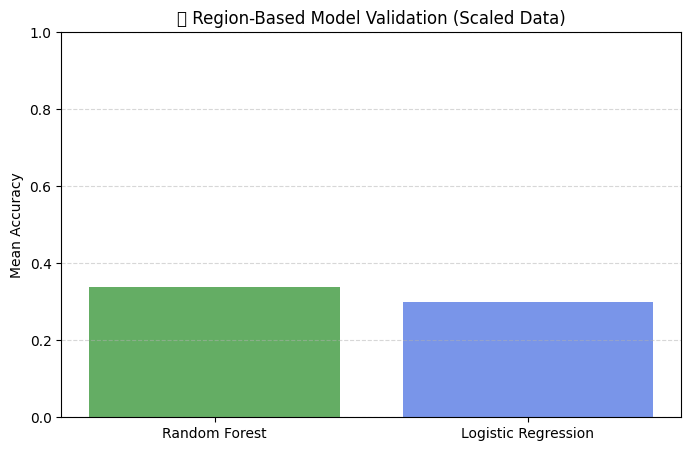

In [40]:
# === Stage 3: Scale Inputs + Re-run Region Validation with Visualization ===

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf_scores_scaled, log_scores_scaled = [], []

print(" Region-Based Validation (with StandardScaler):\n")

for fold, (train_idx, test_idx) in enumerate(gkf.split(X_scaled, y, groups)):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    preds_rf = rf.predict(X_test)
    acc_rf = accuracy_score(y_test, preds_rf)
    rf_scores_scaled.append(acc_rf)
    
    log_reg = LogisticRegression(max_iter=2000)
    log_reg.fit(X_train, y_train)
    preds_log = log_reg.predict(X_test)
    acc_log = accuracy_score(y_test, preds_log)
    log_scores_scaled.append(acc_log)
    
    print(f"Fold {fold+1} → RF: {acc_rf:.3f} | LogReg: {acc_log:.3f}")

# Mean results
rf_mean = np.mean(rf_scores_scaled)
log_mean = np.mean(log_scores_scaled)

print(f"\n Mean Accuracies → Random Forest: {rf_mean:.3f} | Logistic Regression: {log_mean:.3f}")

# --- Visualization ---
plt.figure(figsize=(8, 5))
plt.bar(['Random Forest', 'Logistic Regression'], [rf_mean, log_mean],
        color=['forestgreen', 'royalblue'], alpha=0.7)
plt.title("🌍 Region-Based Model Validation (Scaled Data)")
plt.ylabel("Mean Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig("mean_accuracy_logistic_rf.png", dpi=300, bbox_inches="tight")
plt.show()


Region-wise feature importance:


,Region 0,Region 1,Region 2
B,0.042148,0.215658,0.255248
Cu,0.012668,0.035501,0.022789
EC,0.083592,0.055675,0.127591
Fe,0.030520,0.064015,0.253421
K,0.235652,0.185593,0.028698
Mn,0.215917,0.076567,0.042376
N,0.006185,0.035799,0.021742
P,0.075327,0.022163,0.097783
S,0.117978,0.167087,0.123097
Zn,0.152885,0.132286,0.016095


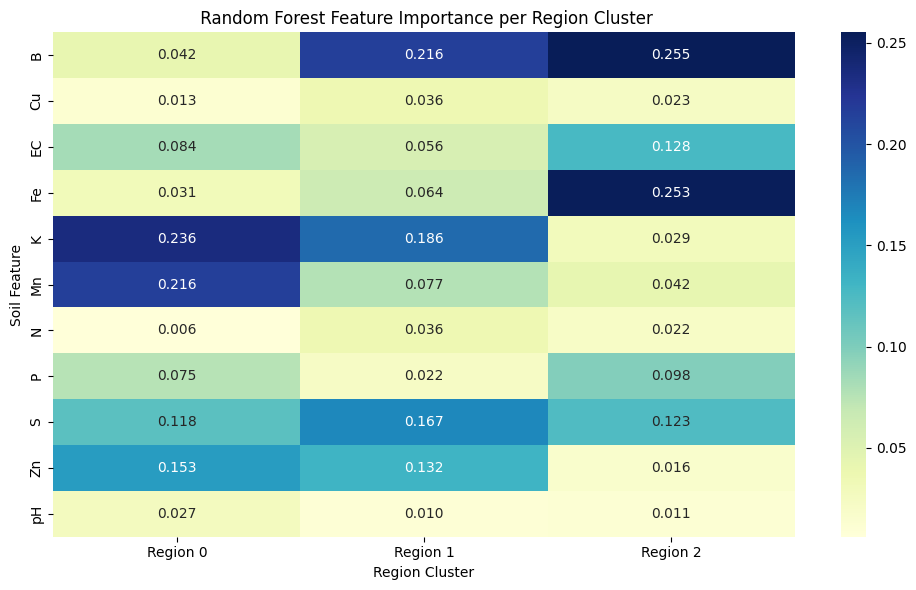

In [42]:
# === Stage 4: Region-Wise Feature Importance Analysis ===

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

region_importance = {}

for region in sorted(df['RegionCluster'].unique()):
    X_region = df[df['RegionCluster'] == region].drop(columns=['label', 'RegionCluster'])
    y_region = df[df['RegionCluster'] == region]['label']
    
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_region, y_region)
    
    importance = rf.feature_importances_
    region_importance[region] = importance

# Convert to DataFrame for visualization
region_importance_df = pd.DataFrame(region_importance, index=X.columns)
region_importance_df.columns = [f"Region {i}" for i in region_importance_df.columns]
region_importance_df = region_importance_df.sort_index()

print("Region-wise feature importance:")
display(region_importance_df)

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.heatmap(region_importance_df, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title(" Random Forest Feature Importance per Region Cluster")
plt.xlabel("Region Cluster")
plt.ylabel("Soil Feature")
plt.tight_layout()
plt.savefig("rf_fature_importance_per_region_cluster.png", dpi=300, bbox_inches="tight")
plt.show()


 Computing SHAP for Region 0 ...
 Computing SHAP for Region 1 ...
 Computing SHAP for Region 2 ...

 Regional SHAP Mean |Feature Impact|:


,Region 0,Region 1,Region 2
N,0.046681,0.004420,0.009387
P,0.013489,0.004781,0.047188
K,0.044532,0.006171,0.003558
pH,0.042752,0.012289,0.025368
EC,0.001637,0.000000,0.046401
S,0.000000,0.000000,0.008353
Cu,0.000000,0.000000,0.000000
Fe,0.000000,0.000000,0.000000
Mn,0.000000,0.000000,0.000000
Zn,0.000000,0.000000,0.000000


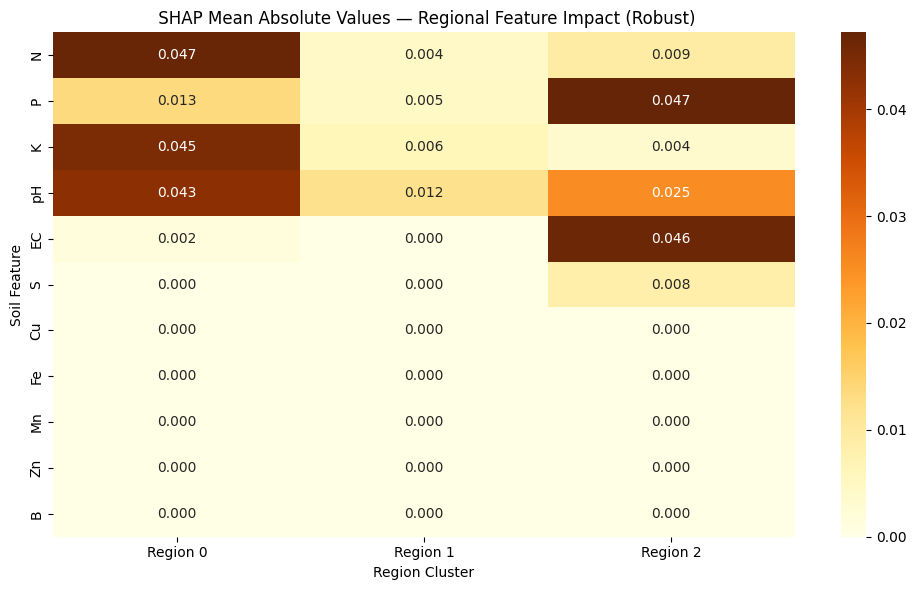

In [45]:
# === Stage 5 (Robust Fix): SHAP Regional Interpretation ===

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

feature_names = df.drop(columns=['label', 'RegionCluster']).columns
region_shap_summary = {}

for region in sorted(df['RegionCluster'].unique()):
    print(f" Computing SHAP for Region {region} ...")
    
    X_region = df[df['RegionCluster'] == region].drop(columns=['label', 'RegionCluster'])
    y_region = df[df['RegionCluster'] == region]['label']
    
    # Fit region-specific Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_region, y_region)
    
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(X_region)
    
    shap_values = np.array(shap_values)
    
    # Handle multi-class SHAP outputs
    if shap_values.ndim == 3:
        mean_abs_shap = np.mean(np.abs(shap_values), axis=(0, 1))
    else:
        mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
    
    #  Ensure alignment with all features (pad with zeros if missing)
    fixed_shap = np.zeros(len(feature_names))
    valid_len = min(len(mean_abs_shap), len(fixed_shap))
    fixed_shap[:valid_len] = mean_abs_shap[:valid_len]
    
    region_shap_summary[region] = fixed_shap

#  Build DataFrame safely
region_shap_df = pd.DataFrame(region_shap_summary, index=feature_names)
region_shap_df.columns = [f"Region {i}" for i in region_shap_df.columns]

print("\n Regional SHAP Mean |Feature Impact|:")
display(region_shap_df)

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.heatmap(region_shap_df, annot=True, cmap="YlOrBr", fmt=".3f")
plt.title(" SHAP Mean Absolute Values — Regional Feature Impact (Robust)")
plt.xlabel("Region Cluster")
plt.ylabel("Soil Feature")
plt.tight_layout()
plt.savefig("SHAP_mean_absolute_values.png", dpi=300, bbox_inches="tight")
plt.show()


 Computing directional SHAP for Region 0 ...
 Computing directional SHAP for Region 1 ...
 Computing directional SHAP for Region 2 ...

 Regional SHAP Mean (Signed) — Directional Impact:


,Region 0,Region 1,Region 2
N,0.000050,0.000143,0.000025
P,-0.000100,0.000194,0.000332
K,-0.000373,-0.000236,-0.000160
pH,0.000392,-0.000101,0.000016
EC,0.000031,0.000000,-0.000258
S,0.000000,0.000000,0.000045
Cu,0.000000,0.000000,0.000000
Fe,0.000000,0.000000,0.000000
Mn,0.000000,0.000000,0.000000
Zn,0.000000,0.000000,0.000000


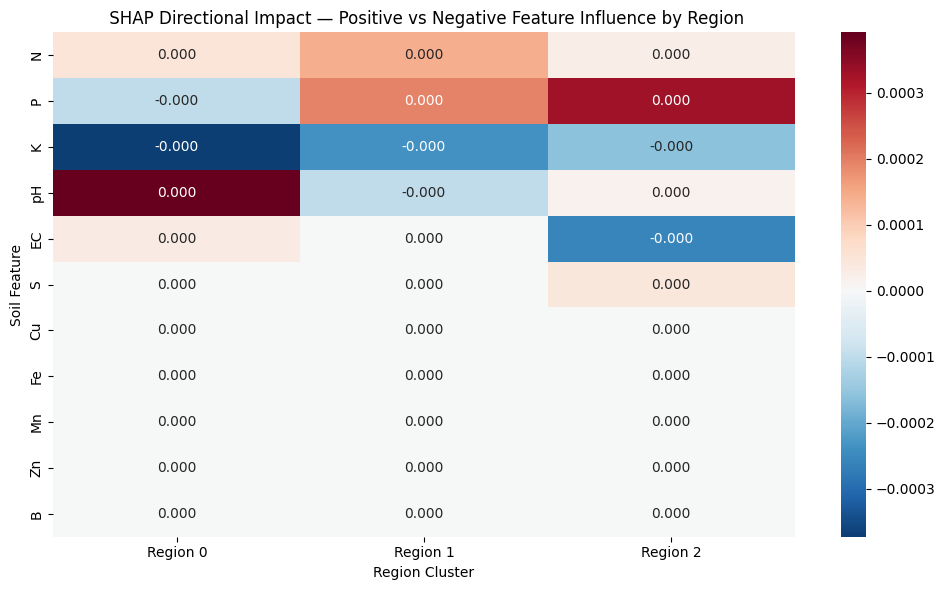

In [47]:
# === Stage 6: Directional SHAP Heatmap (Positive vs Negative Effects) ===

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

feature_names = df.drop(columns=['label', 'RegionCluster']).columns
region_shap_mean = {}

for region in sorted(df['RegionCluster'].unique()):
    print(f" Computing directional SHAP for Region {region} ...")
    
    X_region = df[df['RegionCluster'] == region].drop(columns=['label', 'RegionCluster'])
    y_region = df[df['RegionCluster'] == region]['label']
    
    # Train region-specific RF
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_region, y_region)
    
    explainer = shap.TreeExplainer(rf)
    shap_values = explainer.shap_values(X_region)
    shap_values = np.array(shap_values)
    
    # Handle multi-class models — average across classes
    if shap_values.ndim == 3:
        mean_signed_shap = np.mean(shap_values, axis=(0, 1))  # keep signs
    else:
        mean_signed_shap = np.mean(shap_values, axis=0)
    
    # Align shape (pad with zeros if needed)
    fixed_shap = np.zeros(len(feature_names))
    valid_len = min(len(mean_signed_shap), len(fixed_shap))
    fixed_shap[:valid_len] = mean_signed_shap[:valid_len]
    
    region_shap_mean[region] = fixed_shap

# Build DataFrame
region_shap_dir_df = pd.DataFrame(region_shap_mean, index=feature_names)
region_shap_dir_df.columns = [f"Region {i}" for i in region_shap_dir_df.columns]

print("\n Regional SHAP Mean (Signed) — Directional Impact:")
display(region_shap_dir_df)

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.heatmap(
    region_shap_dir_df, 
    annot=True, 
    cmap="RdBu_r", 
    center=0, 
    fmt=".3f"
)
plt.title(" SHAP Directional Impact — Positive vs Negative Feature Influence by Region")
plt.xlabel("Region Cluster")
plt.ylabel("Soil Feature")
plt.tight_layout()
plt.savefig("SHAP_directional_impact_region.png", dpi=300, bbox_inches="tight")
plt.show()



🌾 Dominant Label per Region:
  Region 0 → mulberry
  Region 1 → ragi
  Region 2 → potato


/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_13965/3895138195.py:40: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_13965/3895138195.py:41: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.savefig("direction_SHAP_impact_fatureInfluence_regionAndDominantCrop.png", dpi=300, bbox_inches="tight")
/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


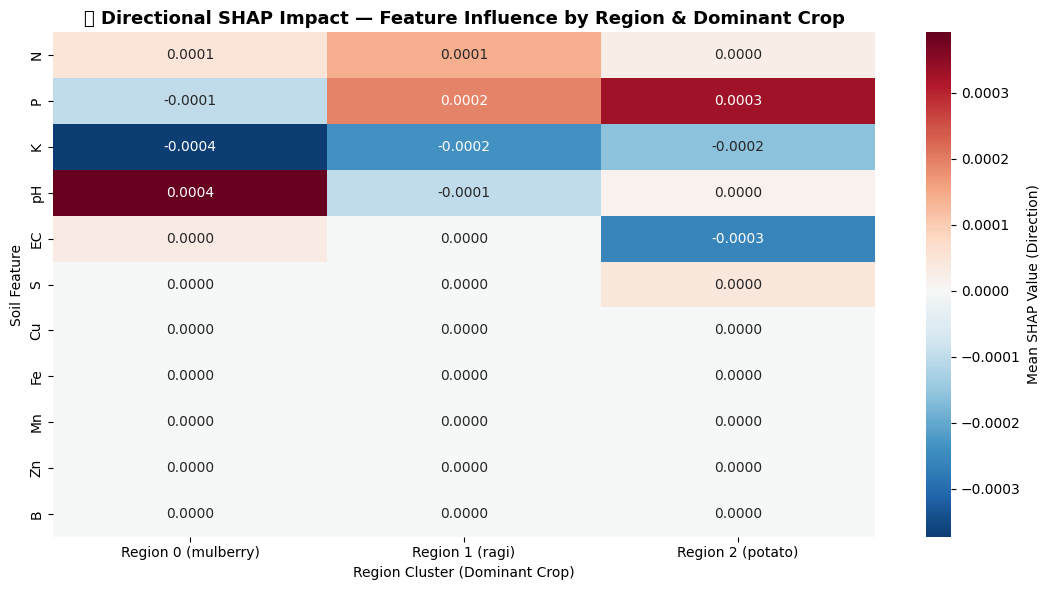

In [48]:
# === Step 7: Annotated SHAP Heatmap with Region Labels ===

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1️⃣ Determine the dominant (most frequent) label in each region
region_labels = (
    df.groupby("RegionCluster")["label"]
    .agg(lambda x: x.value_counts().index[0])
    .to_dict()
)

print("🌾 Dominant Label per Region:")
for region, label in region_labels.items():
    print(f"  Region {region} → {label}")

# 2️⃣ Rename heatmap columns to include crop labels
annotated_cols = [
    f"Region {r} ({region_labels[r]})" if r in region_labels else f"Region {r}"
    for r in region_shap_dir_df.columns.str.extract(r"(\d+)")[0].astype(int)
]
region_shap_dir_df.columns = annotated_cols

# 3️⃣ Plot annotated SHAP directional heatmap
plt.figure(figsize=(11, 6))
sns.heatmap(
    region_shap_dir_df,
    annot=True,
    cmap="RdBu_r",
    center=0,
    fmt=".4f",
    cbar_kws={'label': 'Mean SHAP Value (Direction)'}
)

plt.title("🌾 Directional SHAP Impact — Feature Influence by Region & Dominant Crop", fontsize=13, weight="bold")
plt.xlabel("Region Cluster (Dominant Crop)")
plt.ylabel("Soil Feature")
plt.tight_layout()
plt.savefig("direction_SHAP_impact_fatureInfluence_regionAndDominantCrop.png", dpi=300, bbox_inches="tight")
plt.show()


/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_13965/3218434798.py:29: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.94])
/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


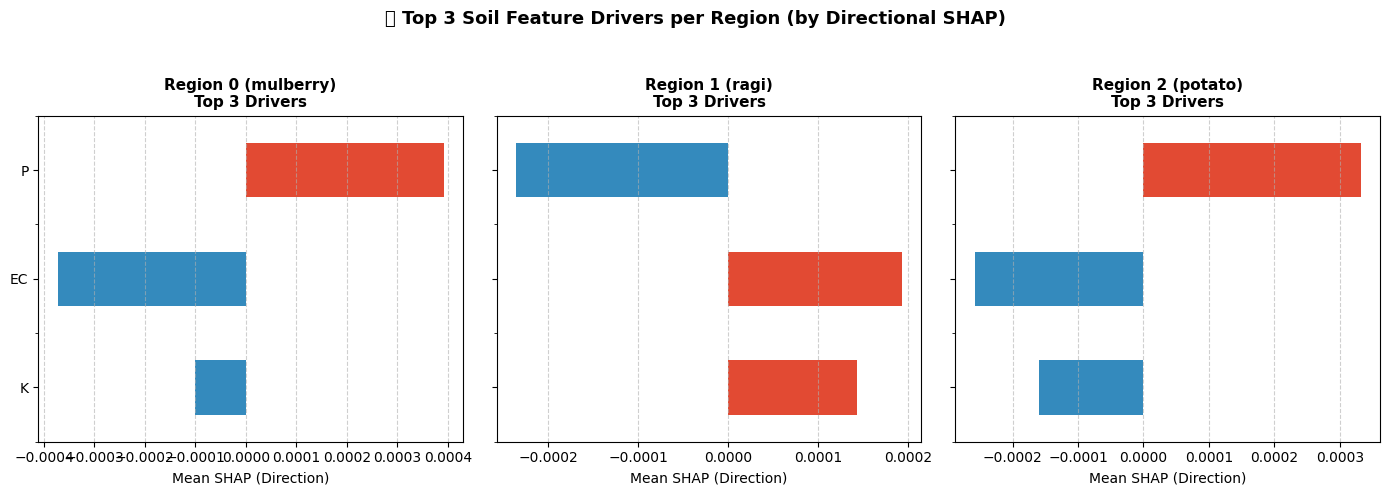

In [12]:
# === Step 8: Top 3 Regional Feature Drivers (Bar Chart) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute absolute SHAP values
abs_shap = region_shap_dir_df.abs()

# For each region, get top 3 features
top_features = {}
for col in region_shap_dir_df.columns:
    top_feats = abs_shap[col].nlargest(3).index.tolist()
    top_features[col] = region_shap_dir_df.loc[top_feats, col]

# Plot
fig, axes = plt.subplots(1, len(top_features), figsize=(14, 5), sharey=True)
if len(top_features) == 1:
    axes = [axes]

for i, (region, shap_vals) in enumerate(top_features.items()):
    colors = ["#E24A33" if v > 0 else "#348ABD" for v in shap_vals]
    shap_vals.plot.barh(ax=axes[i], color=colors)
    axes[i].set_title(f"{region}\nTop 3 Drivers", fontsize=11, weight="bold")
    axes[i].invert_yaxis()
    axes[i].set_xlabel("Mean SHAP (Direction)")
    axes[i].grid(axis="x", linestyle="--", alpha=0.6)

fig.suptitle("🌾 Top 3 Soil Feature Drivers per Region (by Directional SHAP)", fontsize=13, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


🌱 Crop-Wise Directional SHAP Summary (mean impacts):


,mulberry,ragi,potato
N,0.00005,0.00014,0.00002
P,-0.00010,0.00019,0.00033
K,-0.00037,-0.00024,-0.00016
pH,0.00039,-0.00010,0.00002
EC,0.00003,0.00000,-0.00026
S,0.00000,0.00000,0.00005
Cu,0.00000,0.00000,0.00000
Fe,0.00000,0.00000,0.00000
Mn,0.00000,0.00000,0.00000
Zn,0.00000,0.00000,0.00000


/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_13965/4045128048.py:33: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


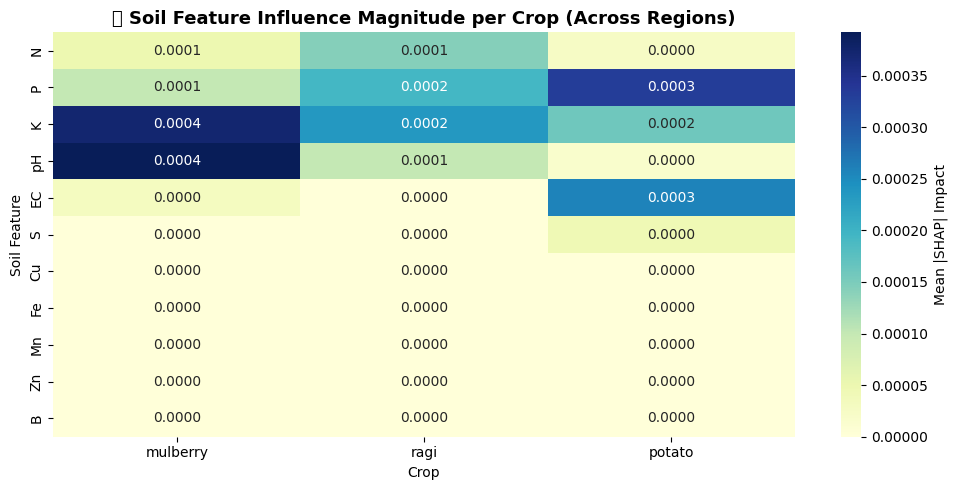

In [13]:
# === Step 9: Crop-Wise SHAP Summary (Aggregated Across Regions) ===

# Compute the dominant crop label for each region again
region_labels = (
    df.groupby("RegionCluster")["label"]
    .agg(lambda x: x.value_counts().index[0])
    .to_dict()
)

# Aggregate SHAP values per crop across regions
crop_shap_summary = {}
for col in region_shap_dir_df.columns:
    region_num = int(col.split(" ")[1].replace("(", "").replace(")", "").strip())
    crop = region_labels.get(region_num, f"Region {region_num}")
    crop_shap_summary[crop] = region_shap_dir_df[col]

crop_shap_df = pd.DataFrame(crop_shap_summary)
print("🌱 Crop-Wise Directional SHAP Summary (mean impacts):")
display(crop_shap_df.round(5))

# Visualize mean absolute SHAP influence per crop
plt.figure(figsize=(10, 5))
sns.heatmap(
    crop_shap_df.abs(),
    annot=True,
    cmap="YlGnBu",
    fmt=".4f",
    cbar_kws={'label': 'Mean |SHAP| Impact'}
)
plt.title("🌾 Soil Feature Influence Magnitude per Crop (Across Regions)", fontsize=13, weight="bold")
plt.xlabel("Crop")
plt.ylabel("Soil Feature")
plt.tight_layout()
plt.show()


In [14]:
# === Step 10: Automated Interpretation of SHAP Insights per Crop ===

import numpy as np

def interpret_crop_shap(crop_shap_df):
    interpretations = []
    for crop in crop_shap_df.columns:
        shap_values = crop_shap_df[crop]
        
        # Sort by direction
        top_positive = shap_values.sort_values(ascending=False).head(2)
        top_negative = shap_values.sort_values(ascending=True).head(2)
        
        text = f"🌱 **{crop.capitalize()} Soil Insights**\n"
        text += f"  • Positive Influence → {', '.join([f'{f} (+{v:.5f})' for f, v in top_positive.items()])}\n"
        text += f"  • Negative Influence → {', '.join([f'{f} ({v:.5f})' for f, v in top_negative.items()])}\n"
        
        # Interpretation sentence
        text += f"  👉 Soils with higher {top_positive.index[0]} and {top_positive.index[1]} tend to favor {crop},\n"
        text += f"     whereas excess {top_negative.index[0]} or {top_negative.index[1]} may reduce its suitability.\n"
        interpretations.append(text)
    
    return "\n".join(interpretations)

# Generate and display interpretations
interpretation_text = interpret_crop_shap(crop_shap_df)
from IPython.display import Markdown
display(Markdown(interpretation_text))


🌱 **Mulberry Soil Insights**
  • Positive Influence → pH (+0.00039), N (+0.00005)
  • Negative Influence → K (-0.00037), P (-0.00010)
  👉 Soils with higher pH and N tend to favor mulberry,
     whereas excess K or P may reduce its suitability.

🌱 **Ragi Soil Insights**
  • Positive Influence → P (+0.00019), N (+0.00014)
  • Negative Influence → K (-0.00024), pH (-0.00010)
  👉 Soils with higher P and N tend to favor ragi,
     whereas excess K or pH may reduce its suitability.

🌱 **Potato Soil Insights**
  • Positive Influence → P (+0.00033), S (+0.00005)
  • Negative Influence → EC (-0.00026), K (-0.00016)
  👉 Soils with higher P and S tend to favor potato,
     whereas excess EC or K may reduce its suitability.


/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_13965/525313778.py:23: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_13965/525313778.py:24: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.savefig("SHAP_direction_crop.png", dpi=300, bbox_inches="tight")


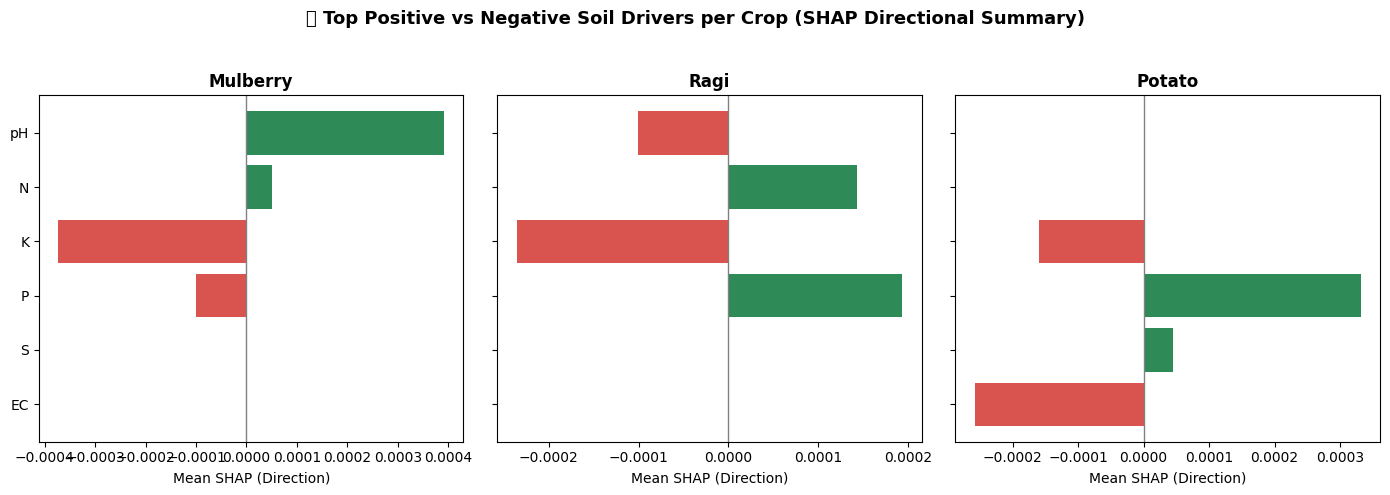

In [49]:
# === Step 11: Composite Visualization — Crop-Wise SHAP Drivers ===
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, len(crop_shap_df.columns), figsize=(14, 5), sharey=True)

for i, crop in enumerate(crop_shap_df.columns):
    shap_vals = crop_shap_df[crop]
    top_pos = shap_vals.sort_values(ascending=False).head(2)
    top_neg = shap_vals.sort_values(ascending=True).head(2)
    
    features = list(top_pos.index) + list(top_neg.index)
    values = list(top_pos.values) + list(top_neg.values)
    colors = ["#2E8B57"] * len(top_pos) + ["#D9534F"] * len(top_neg)
    
    axes[i].barh(features, values, color=colors)
    axes[i].axvline(0, color="gray", linewidth=1)
    axes[i].set_title(f"{crop.capitalize()}", fontsize=12, weight="bold")
    axes[i].set_xlabel("Mean SHAP (Direction)")
    axes[i].invert_yaxis()

fig.suptitle("🌾 Top Positive vs Negative Soil Drivers per Crop (SHAP Directional Summary)", fontsize=13, weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("SHAP_direction_crop.png", dpi=300, bbox_inches="tight")
plt.show()


In [18]:
# === Step 12: Export Summary Table ===
summary_data = []

for crop in crop_shap_df.columns:
    shap_vals = crop_shap_df[crop]
    top_pos = shap_vals.sort_values(ascending=False).head(2)
    top_neg = shap_vals.sort_values(ascending=True).head(2)
    
    summary_data.append({
        "Crop": crop,
        "Positive Drivers": ", ".join(top_pos.index),
        "Negative Drivers": ", ".join(top_neg.index)
    })

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv("../reports/crop_shap_summary.csv", index=False)
print("✅ Exported interpretability summary to outputs/crop_shap_summary.csv")
display(summary_df)


✅ Exported interpretability summary to outputs/crop_shap_summary.csv


,Crop,Positive Drivers,Negative Drivers
0,mulberry,"pH, N","K, P"
1,ragi,"P, N","K, pH"
2,potato,"P, S","EC, K"


In [25]:
probs = rf_model.predict_proba(X)
probs_std = np.std(probs, axis=0)
pd.DataFrame({
    "Crop": rf_model.classes_,
    "Std_Dev_in_Probabilities": probs_std
}).sort_values(by="Std_Dev_in_Probabilities", ascending=False)


,Crop,Std_Dev_in_Probabilities
1,mango,0.363921
4,potato,0.363279
2,mulberry,0.361984
5,ragi,0.361022
0,grapes,0.360569
3,pomegranate,0.360108


=== Preparing Data ===

=== Computing Global SHAP Feature Importance ===


 99%|===================| 3670/3720 [00:41<00:00]        

 SHAP Importances Calculated:
  Feature  SHAP_Importance
3      pH         0.040364
0       N         0.030965
2       K         0.029904
1       P         0.029531
5       S         0.028678

=== Computing Global LIME Feature Importance ===


💡 Computing LIME Explanations: 100%|██████████| 50/50 [00:02<00:00, 22.59it/s]


 LIME Importances Calculated:
   Feature  LIME_Importance
10       B         0.092108
5        S         0.043419
7       Fe         0.032010
2        K         0.030536
1        P         0.028151

=== Combining SHAP and LIME Results ===
 Combined SHAP + LIME Data Saved → ../images/global_lime_shap_comparison/lime_shap_feature_comparison.csv
   Feature  SHAP_Importance  LIME_Importance  LIME_to_SHAP_Ratio
10      pH         0.040364         0.000889            0.022018
6        N         0.030965         0.014827            0.478846
4        K         0.029904         0.030536            1.021124
7        P         0.029531         0.028151            0.953267
8        S         0.028678         0.043419            1.514052


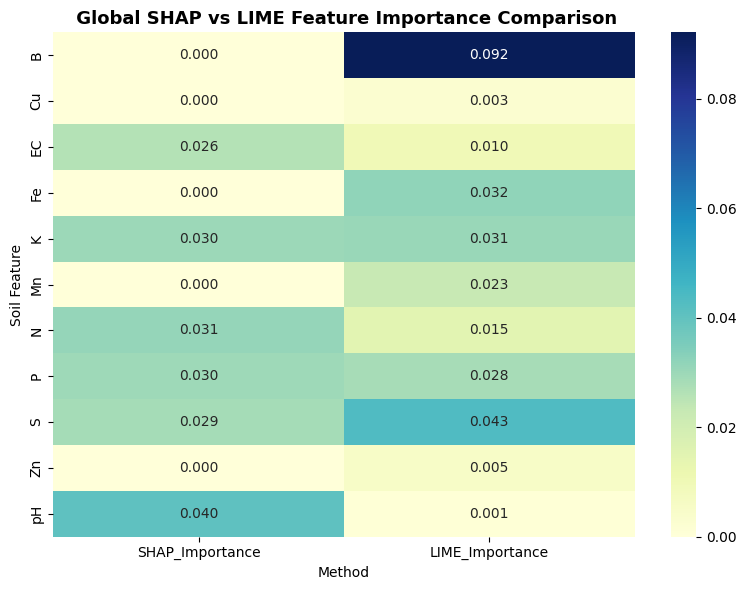

 Heatmap saved → ../images/global_lime_shap_comparison/global_lime_shap_heatmap.png


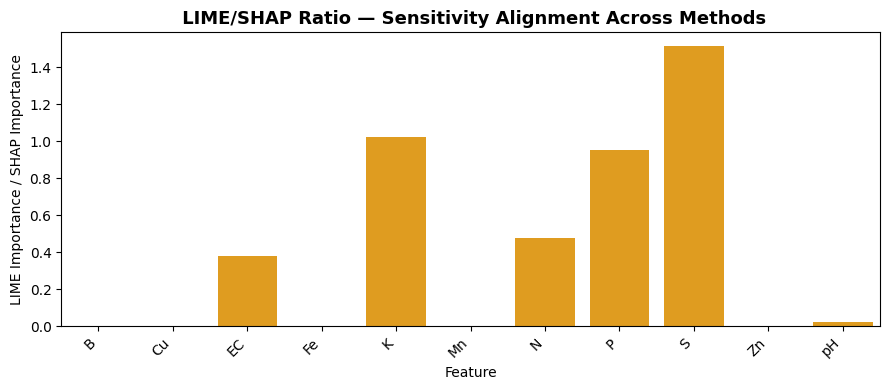

 Ratio bar chart saved → ../images/global_lime_shap_comparison/lime_shap_ratio_bar.png

 All LIME + SHAP global interpretability assets saved successfully.
 Folder: /Users/aarush/projects/soil-health-ml/images/global_lime_shap_comparison


In [52]:
# ===============================================================
#  GLOBAL LIME + SHAP COMPARISON (Multi-class Safe + Saved Outputs)
# ===============================================================

import os
import numpy as np
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------
#  Data Preparation
# ------------------------------------------------------------
print("=== Preparing Data ===")

X = df.drop(columns=["label", "RegionCluster"])
y = df["label"]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Retrain model if needed
rf_model.fit(X_scaled, y)

# Create save directory
save_dir = "../images/global_lime_shap_comparison"
os.makedirs(save_dir, exist_ok=True)

# ------------------------------------------------------------
#  SHAP Global Feature Importance (Multi-class Safe)
# ------------------------------------------------------------
print("\n=== Computing Global SHAP Feature Importance ===")
explainer_shap = shap.Explainer(rf_model, X_scaled)
shap_values = explainer_shap(X_scaled)

if isinstance(shap_values.values, list):
    # For legacy list output
    shap_importance = np.mean([np.abs(sv).mean(axis=0) for sv in shap_values.values], axis=0)
elif shap_values.values.ndim == 3:
    # For modern SHAP (samples x classes x features)
    shap_importance = np.abs(shap_values.values).mean(axis=(0, 1))
else:
    shap_importance = np.abs(shap_values.values).mean(axis=0)

# Build SHAP DataFrame
shap_df = pd.DataFrame({
    "Feature": X.columns[:len(shap_importance)],
    "SHAP_Importance": shap_importance[:len(X.columns)]
}).sort_values(by="SHAP_Importance", ascending=False)

print(" SHAP Importances Calculated:")
print(shap_df.head())

# Save SHAP data
shap_csv = os.path.join(save_dir, "global_shap_feature_importance.csv")
shap_df.to_csv(shap_csv, index=False)

# ------------------------------------------------------------
# LIME Global Feature Importance
# ------------------------------------------------------------
print("\n=== Computing Global LIME Feature Importance ===")
X_np = np.array(X_scaled)

explainer_lime = LimeTabularExplainer(
    training_data=X_np,
    feature_names=X.columns.tolist(),
    class_names=sorted(y.unique()),
    mode="classification",
    discretize_continuous=False,
    kernel_width=3,
    random_state=42
)

lime_values = []
sample_indices = np.random.choice(len(X_scaled), size=50, replace=False)

for i in tqdm(sample_indices, desc="💡 Computing LIME Explanations"):
    exp = explainer_lime.explain_instance(
        data_row=X_np[i],
        predict_fn=lambda x: rf_model.predict_proba(pd.DataFrame(x, columns=X.columns)),
        num_features=len(X.columns),
        num_samples=4000
    )
    weights = dict(exp.as_list())
    lime_values.append([weights.get(f, 0) for f in X.columns])

lime_mean = np.abs(np.mean(lime_values, axis=0))
lime_df = pd.DataFrame({
    "Feature": X.columns,
    "LIME_Importance": lime_mean
}).sort_values(by="LIME_Importance", ascending=False)

print(" LIME Importances Calculated:")
print(lime_df.head())

# Save LIME data
lime_csv = os.path.join(save_dir, "global_lime_feature_importance.csv")
lime_df.to_csv(lime_csv, index=False)

# ------------------------------------------------------------
#  Combine SHAP + LIME for Comparison
# ------------------------------------------------------------
print("\n=== Combining SHAP and LIME Results ===")

comparison_df = pd.merge(shap_df, lime_df, on="Feature", how="outer").fillna(0)
comparison_df["LIME_to_SHAP_Ratio"] = comparison_df.apply(
    lambda row: row["LIME_Importance"]/row["SHAP_Importance"] if row["SHAP_Importance"] > 0 else np.nan,
    axis=1
)

# Save combined data
comparison_csv = os.path.join(save_dir, "lime_shap_feature_comparison.csv")
comparison_df.to_csv(comparison_csv, index=False)

print(" Combined SHAP + LIME Data Saved →", comparison_csv)
print(comparison_df.sort_values(by="SHAP_Importance", ascending=False).head())

# ------------------------------------------------------------
#  Visualization — Heatmap
# ------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(
    comparison_df.set_index("Feature")[["SHAP_Importance", "LIME_Importance"]],
    annot=True, fmt=".3f", cmap="YlGnBu"
)
plt.title(" Global SHAP vs LIME Feature Importance Comparison", fontsize=13, weight="bold")
plt.ylabel("Soil Feature")
plt.xlabel("Method")
plt.tight_layout()

heatmap_path = os.path.join(save_dir, "global_lime_shap_heatmap.png")
plt.savefig(heatmap_path, dpi=300, bbox_inches="tight")
plt.show()
print(f" Heatmap saved → {heatmap_path}")

# ------------------------------------------------------------
#  Visualization — Ratio Bar Chart
# ------------------------------------------------------------
plt.figure(figsize=(9, 4))
sns.barplot(
    data=comparison_df,
    x="Feature", y="LIME_to_SHAP_Ratio", color="orange"
)
plt.xticks(rotation=45, ha="right")
plt.title(" LIME/SHAP Ratio — Sensitivity Alignment Across Methods", fontsize=13, weight="bold")
plt.ylabel("LIME Importance / SHAP Importance")
plt.tight_layout()

ratio_path = os.path.join(save_dir, "lime_shap_ratio_bar.png")
plt.savefig(ratio_path, dpi=300, bbox_inches="tight")
plt.show()
print(f" Ratio bar chart saved → {ratio_path}")

# ------------------------------------------------------------
# 7️⃣ Summary
# ------------------------------------------------------------
print("\n All LIME + SHAP global interpretability assets saved successfully.")
print(f" Folder: {os.path.abspath(save_dir)}")



🌾 Computing SHAP + LIME for crop: grapes


🍃 LIME grapes: 100%|██████████| 30/30 [00:01<00:00, 22.40it/s]



🌾 Computing SHAP + LIME for crop: mango


🍃 LIME mango: 100%|██████████| 30/30 [00:01<00:00, 22.46it/s]



🌾 Computing SHAP + LIME for crop: mulberry


🍃 LIME mulberry: 100%|██████████| 30/30 [00:01<00:00, 22.67it/s]



🌾 Computing SHAP + LIME for crop: pomegranate


🍃 LIME pomegranate: 100%|██████████| 30/30 [00:01<00:00, 22.65it/s]



🌾 Computing SHAP + LIME for crop: potato


🍃 LIME potato: 100%|██████████| 30/30 [00:01<00:00, 22.40it/s]



🌾 Computing SHAP + LIME for crop: ragi


🍃 LIME ragi: 100%|██████████| 30/30 [00:01<00:00, 20.56it/s]
/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_13965/3630690838.py:117: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


📁 Saved: per_crop_shap_lime_comparison.csv


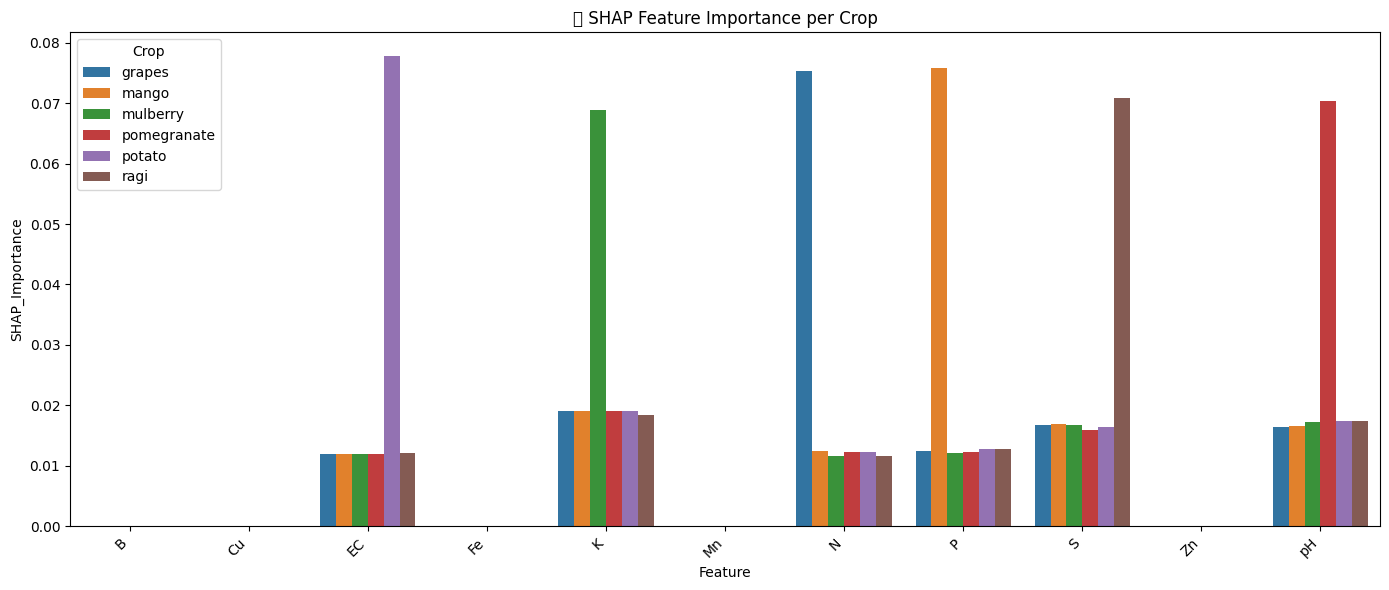

/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_13965/3630690838.py:127: UserWarning: Glyph 127811 (\N{LEAF FLUTTERING IN WIND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127811 (\N{LEAF FLUTTERING IN WIND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


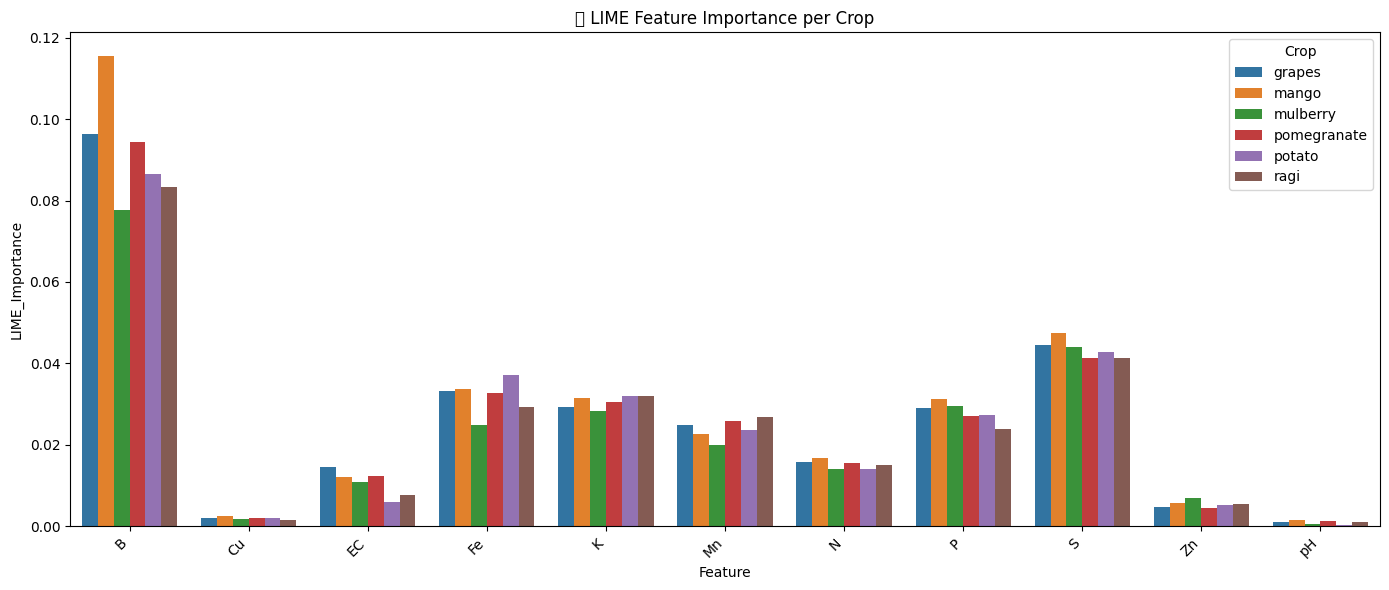

/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_13965/3630690838.py:139: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


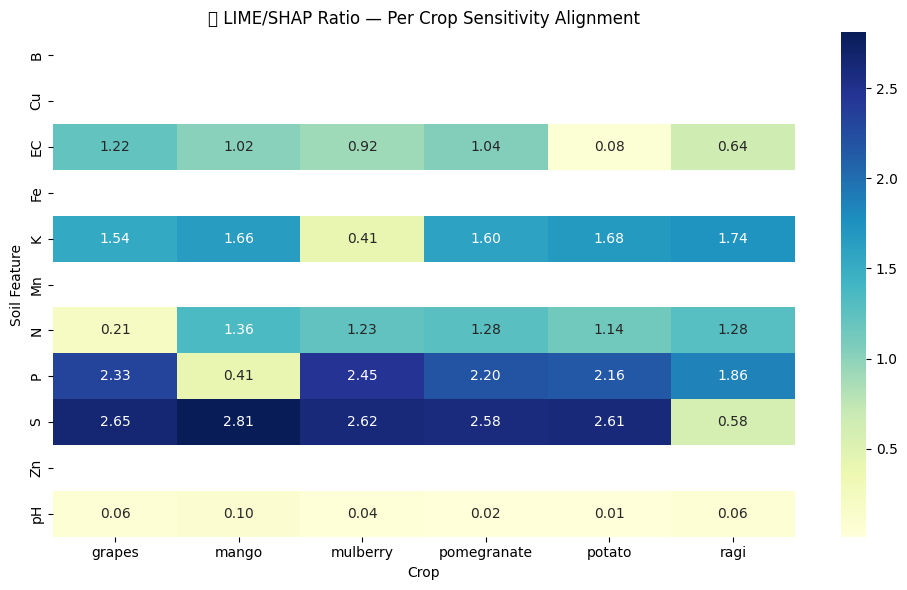

/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_13965/3630690838.py:151: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/aarush/projects/soil-health-ml/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


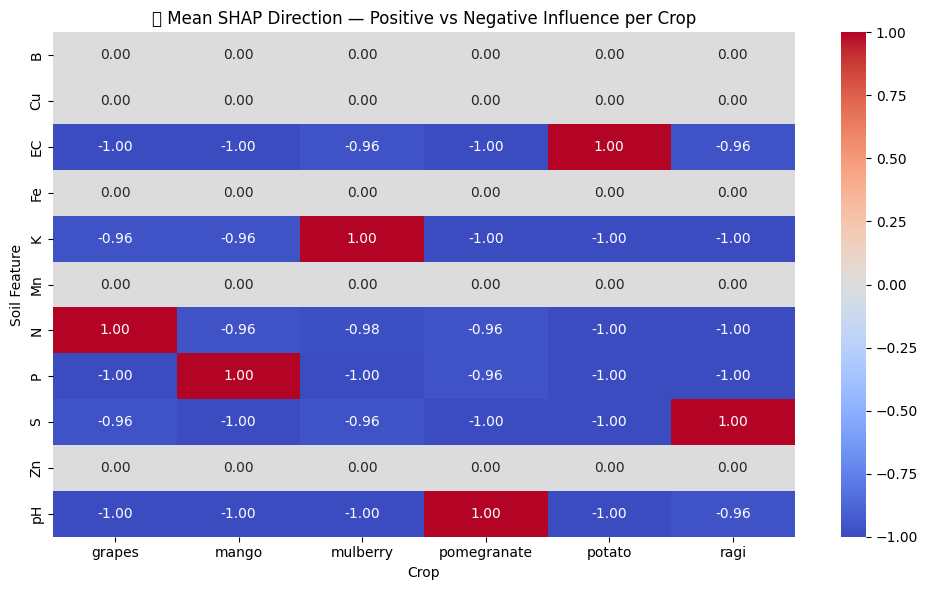


🌿 Top 3 SHAP-based drivers per crop:


/var/folders/mn/c4n_vz_92_s8kpf1y69hj4fw0000gn/T/ipykernel_13965/3630690838.py:159: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: df.sort_values("SHAP_Importance", ascending=False).head(3))


,Crop,Feature,SHAP_Importance,SHAP_Direction,LIME_Importance,LIME_to_SHAP_Ratio
0,grapes,N,0.075391,1.000000,0.015872,0.210529
1,grapes,K,0.019084,-0.961538,0.029315,1.536117
2,grapes,S,0.016800,-0.961538,0.044501,2.648843
3,mango,P,0.075823,1.000000,0.031323,0.413104
4,mango,K,0.019014,-0.961538,0.031577,1.660756
5,mango,S,0.016909,-1.000000,0.047498,2.809079
6,mulberry,K,0.068872,1.000000,0.028253,0.410223
7,mulberry,pH,0.017316,-1.000000,0.000606,0.035025
8,mulberry,S,0.016807,-0.961538,0.044069,2.622132
9,pomegranate,pH,0.070292,1.000000,0.001199,0.017056


In [54]:
# ===============================================================
# 🌾 PER-CROP SHAP + LIME COMPARISON (with Directionality)
# ===============================================================

import numpy as np
import pandas as pd
import shap
from lime.lime_tabular import LimeTabularExplainer
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------
# 1️⃣  Prepare data and model
# ------------------------------------------------------------
X = df.drop(columns=["label", "RegionCluster"])
y = df["label"]

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

rf_model.fit(X_scaled, y)
unique_crops = sorted(y.unique())

# ------------------------------------------------------------
# 2️⃣  Function to compute SHAP and LIME per crop
# ------------------------------------------------------------
def compute_explanations_for_crop(crop_label):
    print(f"\n🌾 Computing SHAP + LIME for crop: {crop_label}")

    # Select only rows of this crop
    X_crop = X_scaled[y == crop_label]

    # ---- SHAP ----
    explainer_shap = shap.Explainer(rf_model, X_scaled)
    shap_values = explainer_shap(X_crop)

    # --- Handle multi-class and binary cases safely ---
    if shap_values.values.ndim == 3:
        shap_mean = shap_values.values.mean(axis=1)  # average over classes per sample
        shap_importance = np.abs(shap_mean).mean(axis=0)
        shap_direction = np.sign(shap_mean).mean(axis=0)
    elif shap_values.values.ndim == 2:
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_direction = np.sign(shap_values.values).mean(axis=0)
    else:
        raise ValueError(f"Unexpected SHAP shape: {shap_values.values.shape}")

    shap_df = pd.DataFrame({
        "Feature": X.columns[:len(shap_importance)],
        "SHAP_Importance": shap_importance[:len(X.columns)],
        "SHAP_Direction": shap_direction[:len(X.columns)]
    })

    # ---- LIME ----
    explainer_lime = LimeTabularExplainer(
        training_data=np.array(X_scaled),
        feature_names=X.columns,
        class_names=unique_crops,
        mode="classification",
        discretize_continuous=False,
        random_state=42
    )

    lime_values = []
    sample_indices = np.random.choice(X_crop.index, size=min(30, len(X_crop)), replace=False)

    for i in tqdm(sample_indices, desc=f"🍃 LIME {crop_label}"):
        exp = explainer_lime.explain_instance(
            data_row=X_scaled.loc[i],
            predict_fn=lambda x: rf_model.predict_proba(pd.DataFrame(x, columns=X.columns)),
            num_features=len(X.columns),
            num_samples=4000
        )
        weights = dict(exp.as_list())
        lime_values.append([weights.get(f, 0) for f in X.columns])

    lime_mean = np.abs(np.mean(lime_values, axis=0))
    lime_df = pd.DataFrame({
        "Feature": X.columns,
        "LIME_Importance": lime_mean
    })

    # ---- Merge results ----
    merged = pd.merge(shap_df, lime_df, on="Feature", how="outer").fillna(0)
    merged["Crop"] = crop_label
    merged["LIME_to_SHAP_Ratio"] = merged.apply(
        lambda r: r["LIME_Importance"] / r["SHAP_Importance"] if r["SHAP_Importance"] > 0 else np.nan,
        axis=1
    )

    return merged


# ------------------------------------------------------------
# 3️⃣  Loop through crops and combine results
# ------------------------------------------------------------
crop_results = []
for crop in unique_crops:
    crop_results.append(compute_explanations_for_crop(crop))

results_df = pd.concat(crop_results, ignore_index=True)
results_df.to_csv("per_crop_shap_lime_comparison.csv", index=False)
print("📁 Saved: per_crop_shap_lime_comparison.csv")

# ------------------------------------------------------------
# 4️⃣  Visualization per crop
# ------------------------------------------------------------
plt.figure(figsize=(14, 6))
sns.barplot(
    data=results_df,
    x="Feature", y="SHAP_Importance", hue="Crop"
)
plt.title("🌾 SHAP Feature Importance per Crop")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(
    data=results_df,
    x="Feature", y="LIME_Importance", hue="Crop"
)
plt.title("🍃 LIME Feature Importance per Crop")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 5️⃣  Ratio heatmap
# ------------------------------------------------------------
pivot_ratio = results_df.pivot(index="Feature", columns="Crop", values="LIME_to_SHAP_Ratio")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_ratio, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("🌱 LIME/SHAP Ratio — Per Crop Sensitivity Alignment")
plt.ylabel("Soil Feature")
plt.xlabel("Crop")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 6️⃣  Directional SHAP Heatmap
# ------------------------------------------------------------
pivot_dir = results_df.pivot(index="Feature", columns="Crop", values="SHAP_Direction")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_dir, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("🌿 Mean SHAP Direction — Positive vs Negative Influence per Crop")
plt.ylabel("Soil Feature")
plt.xlabel("Crop")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 7️⃣  Top 3 drivers summary per crop
# ------------------------------------------------------------
top_drivers = (
    results_df.groupby("Crop")
    .apply(lambda df: df.sort_values("SHAP_Importance", ascending=False).head(3))
    .reset_index(drop=True)
)
print("\n🌿 Top 3 SHAP-based drivers per crop:")
display(top_drivers[["Crop", "Feature", "SHAP_Importance", "SHAP_Direction", "LIME_Importance", "LIME_to_SHAP_Ratio"]])


In [55]:
# ===============================================================
#  CROP INSIGHT GENERATOR — from SHAP + LIME Results
# ===============================================================

import pandas as pd
import numpy as np

# If results_df already exists, skip this
# Otherwise, load it from the saved file
try:
    results_df
except NameError:
    results_df = pd.read_csv("per_crop_shap_lime_comparison.csv")

# ------------------------------------------------------------
#   Clean and ensure consistency
# ------------------------------------------------------------
results_df["SHAP_Direction"] = results_df["SHAP_Direction"].astype(float)
results_df["SHAP_Importance"] = results_df["SHAP_Importance"].astype(float)

# Keep only significant features (avoid low noise)
filtered_df = results_df[results_df["SHAP_Importance"] > results_df["SHAP_Importance"].mean() * 0.5]

# ------------------------------------------------------------
#  Generate Positive/Negative Feature Lists per Crop
# ------------------------------------------------------------
insights = []

for crop, df_crop in filtered_df.groupby("Crop"):
    positive_feats = df_crop[df_crop["SHAP_Direction"] > 0]["Feature"].tolist()
    negative_feats = df_crop[df_crop["SHAP_Direction"] < 0]["Feature"].tolist()

    # Format them nicely
    pos_text = ", ".join(positive_feats) if positive_feats else "None"
    neg_text = ", ".join(negative_feats) if negative_feats else "None"

    summary = {
        "Crop": crop,
        "Positive_Influence": pos_text,
        "Negative_Influence": neg_text,
        "Top_Features": ", ".join(df_crop.sort_values("SHAP_Importance", ascending=False)["Feature"].head(3))
    }

    insights.append(summary)

insights_df = pd.DataFrame(insights)

# ------------------------------------------------------------
# 3️⃣  Human-readable Summary Output
# ------------------------------------------------------------
print("\n **Soil–Crop SHAP Directional Insights Summary**")
for _, row in insights_df.iterrows():
    print(f"\n {row['Crop'].capitalize()} Soil Insights:")
    print(f"• Positive Influence → {row['Positive_Influence']}")
    print(f"• Negative Influence → {row['Negative_Influence']}")
    print(f" Most influential overall → {row['Top_Features']}")

# ------------------------------------------------------------
#   Save outputs
# -----------------------------------------------------------
insights_df.to_csv("crop_soil_insight_summary.csv", index=False)

# Optionally save as Markdown for reports
with open("crop_soil_insight_summary.md", "w") as f:
    f.write("#  Crop-Specific Soil Insights\n\n")
    for _, row in insights_df.iterrows():
        f.write(f"## {row['Crop'].capitalize()}\n")
        f.write(f"- **Positive Influence →** {row['Positive_Influence']}\n")
        f.write(f"- **Negative Influence →** {row['Negative_Influence']}\n")
        f.write(f"- **Top Drivers →** {row['Top_Features']}\n\n")

print("\n📁 Saved summaries to:")
print("  • crop_soil_insight_summary.csv")
print("  • crop_soil_insight_summary.md")



 **Soil–Crop SHAP Directional Insights Summary**

 Grapes Soil Insights:
• Positive Influence → N
• Negative Influence → EC, K, P, S, pH
 Most influential overall → N, K, S

 Mango Soil Insights:
• Positive Influence → P
• Negative Influence → EC, K, N, S, pH
 Most influential overall → P, K, S

 Mulberry Soil Insights:
• Positive Influence → K
• Negative Influence → EC, N, P, S, pH
 Most influential overall → K, pH, S

 Pomegranate Soil Insights:
• Positive Influence → pH
• Negative Influence → EC, K, N, P, S
 Most influential overall → pH, K, S

 Potato Soil Insights:
• Positive Influence → EC
• Negative Influence → K, N, P, S, pH
 Most influential overall → EC, K, pH

 Ragi Soil Insights:
• Positive Influence → S
• Negative Influence → EC, K, N, P, pH
 Most influential overall → S, K, pH

📁 Saved summaries to:
  • crop_soil_insight_summary.csv
  • crop_soil_insight_summary.md
